In [13]:
# ===== Librerias
import os, sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

# ====== Variables globales
__file__      = os.path.join(os.getcwd(),'data_exploring.ipynb')
location_path = os.path.dirname(os.path.dirname(os.path.dirname(__file__)))

# ===== Modulos
sys.path.append(location_path)
from Scripts.Preprocessing.clean_data import Cleaner
from Scripts.Preprocessing.standard_data import Standardizer
from Scripts.Preprocessing.normalize_data import Normalizer
from Scripts.Predictions.linear_regression import ModeloRegresionLineal

## Data Exploring

In [14]:
# ===== Raw - train data
raw_data_path = os.path.join(location_path,'Files','Data','Raw','train.csv')
df = pd.read_csv(raw_data_path)
df.info()

# ===== Raw - predict data
raw_data_path = os.path.join(location_path,'Files','Data','Raw','prediction.csv')
df_predict = pd.read_csv(raw_data_path)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Id      2000 non-null   int64  
 1   yearID  2000 non-null   int64  
 2   S       2000 non-null   int64  
 3   2B      2000 non-null   int64  
 4   3B      2000 non-null   int64  
 5   HR      2000 non-null   int64  
 6   BB      2000 non-null   int64  
 7   HBP     1895 non-null   float64
 8   SH      1805 non-null   float64
 9   SF      1454 non-null   float64
 10  OIP     2000 non-null   int64  
 11  SO      1947 non-null   float64
 12  GIDP    1540 non-null   float64
 13  SB      1919 non-null   float64
 14  CS      1588 non-null   float64
 15  R       2000 non-null   int64  
dtypes: float64(7), int64(9)
memory usage: 250.1 KB


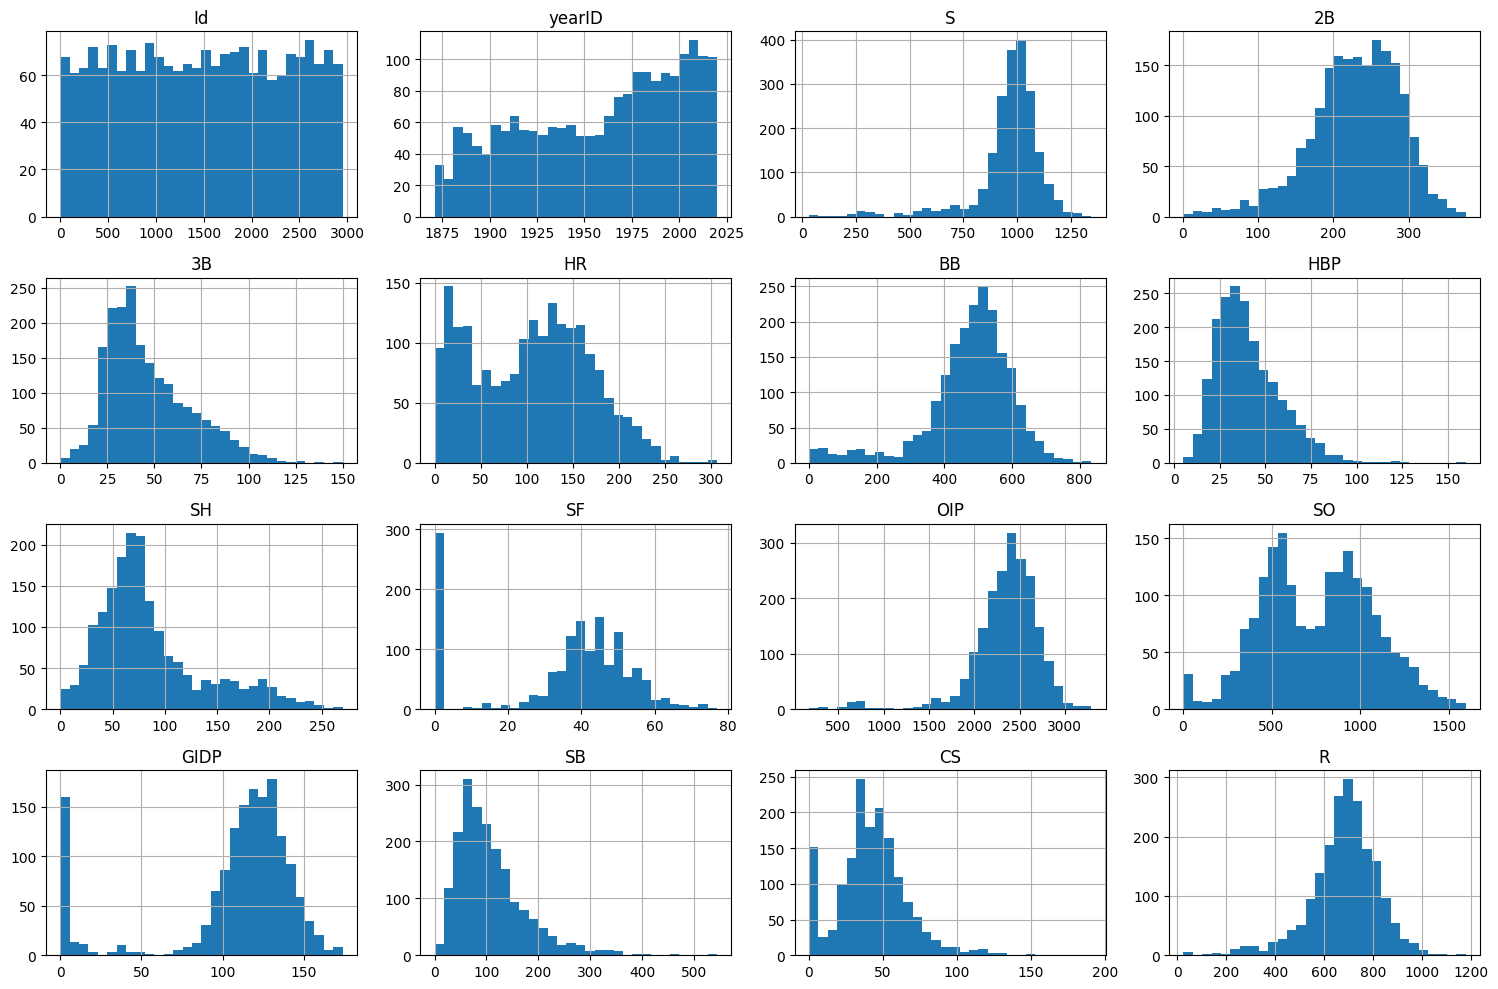

In [15]:
# ===== Histograma
df.hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

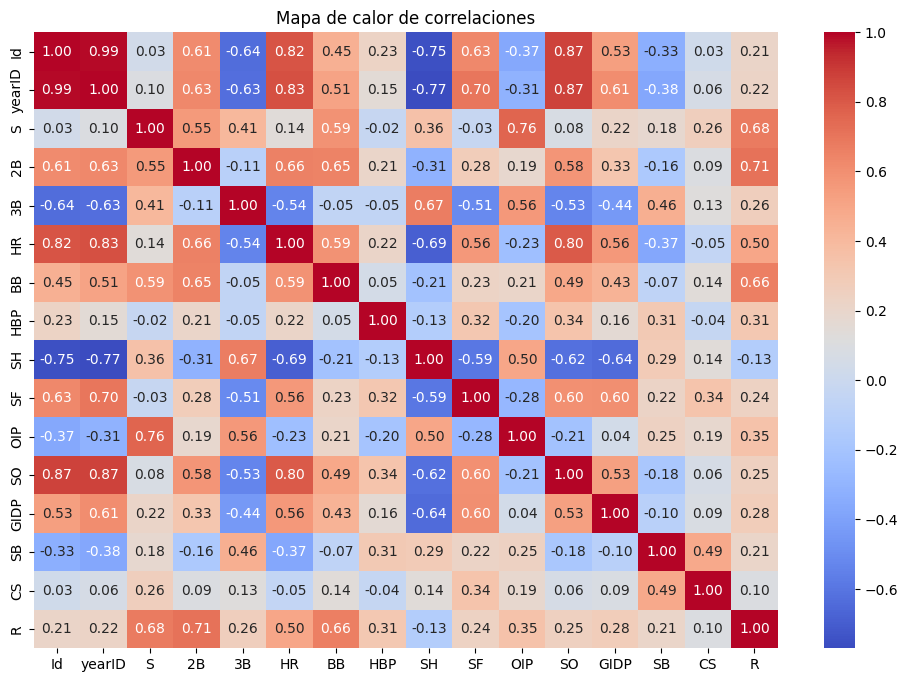

In [16]:
# ===== Correlacion
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Mapa de calor de correlaciones")
plt.show()

In [17]:
# ===== Data Preprocessing
# Training
cleaner = Cleaner(df = df)
df = cleaner.limpiar_patron('mean')
# standardizer = Standardizer(df = df)
# df = standardizer.estandarizar_datos(excluir=['R','Id','yearID'])
df.info()

# Predicting
cleaner = Cleaner(df = df_predict)
df_predict = cleaner.limpiar_patron('mean')
# standardizer = Standardizer(df = df_predict)
# df_predict = standardizer.estandarizar_datos(excluir=['Id','yearID'])

# ===== Data Splitting
X = df.drop(columns=['R'])
y = df['R']
X_train, X_dev, y_train, y_dev = train_test_split(X, y, test_size=0.2, random_state=42)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 23 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            2000 non-null   int64  
 1   yearID        2000 non-null   int64  
 2   S             2000 non-null   int64  
 3   2B            2000 non-null   int64  
 4   3B            2000 non-null   int64  
 5   HR            2000 non-null   int64  
 6   BB            2000 non-null   int64  
 7   HBP           2000 non-null   float64
 8   SH            2000 non-null   float64
 9   SF            2000 non-null   float64
 10  OIP           2000 non-null   int64  
 11  SO            2000 non-null   float64
 12  GIDP          2000 non-null   float64
 13  SB            2000 non-null   float64
 14  CS            2000 non-null   float64
 15  R             2000 non-null   int64  
 16  HBP_missing   2000 non-null   int64  
 17  SH_missing    2000 non-null   int64  
 18  SF_missing    2000 non-null 

In [18]:
# ===== Model Training
modelo = ModeloRegresionLineal(
    gd_type='mini-batch',
    regularizacion='lasso'
)

modelo.entrenar_modelo(X_train,y_train)

df_predicciones = modelo.predecir(X_dev)
df_predicciones['R'] = y_dev.values

rmse = modelo.evaluar(df_predicciones)

print(f"El rmse: {rmse}")

df_predict = modelo.predecir(df_predict)
df_predict = df_predict[['Id','R_pred']]
df_predict.columns = ['Id','R']
df_predict.to_csv('test.csv',index=False)


El rmse: 8.942108756255979e+16
